In [1289]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import yfinance as yf
import ta
import matplotlib as mpl
from matplotlib import cycler


In [1290]:

# Import the data
df = yf.download("NFLX")[["Open", "High", "Low", "Adj Close", "Volume"]]

df.columns = ["open", "high", "low", "close", "volume"]


[*********************100%***********************]  1 of 1 completed


In [1291]:


def feature_engineering(df):
    """ Create new variables"""

    # We copy the dataframe to avoid interferences in the data
    df_copy = df.dropna().copy()

    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_indicators = ta.add_all_ta_features(
        df, open="open", high="high", low="low", close="close", volume="volume", fillna=True).shift(1)
    df_indicators = df_indicators.iloc[:, 6:]
    dfc = pd.concat((df_indicators, df_copy), axis=1)

    return dfc.dropna()


In [1292]:

pd.set_option('display.max_columns', None)
dfc = feature_engineering(df)


In [1293]:
dfc

,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,open,high,low,close,volume,returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-05-24,1.047900e+08,0.044131,0.000000e+00,0.000000,0.000000,-1.037656e+08,1.195000,50.000000,1000.000000,1.196429,1.196429,1.196429,0.000000,0.000000,0.0,0.0,1.195000,1.292143,1.097857,16.258232,0.507355,0.0,0.0,1.145714,1.242857,1.194286,8.119406,0.522065,0.000000,0.000000,0.000000,0.000000,0.000000,1.196429,1.196429,1.196429,1.196429,0.000000,0.000000,0.000000,-99.011250,1.000000,121.073544,-990.214858,-990.214858,0.000000,1.194286,1.194286,1.194286,1.194286,0.000000e+00,0.000000,0.000000,0.000000,0.000000,121.776301,121.199230,4.0,4.0,0.0,1.071429,1.242857,0.0,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.206545,52.206545,-47.793455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.196429,-99.021486,0.000000,0.000000,1.214286,1.225000,1.197143,1.210000,11104800,0.011343
2002-05-28,1.158948e+08,0.032532,1.507035e+05,0.004211,0.004211,-1.036387e+08,1.196506,100.000000,1011.342941,1.203215,1.216786,1.189644,2.255795,0.750000,0.0,0.0,1.202857,1.265357,1.140357,10.391924,0.557143,0.0,0.0,1.145714,1.242857,1.194286,8.073617,0.661767,0.000000,0.000000,0.001083,0.000217,0.000866,1.203215,1.203215,1.198517,1.197434,0.000654,0.000377,0.000277,0.002215,1.882531,121.066759,-990.159362,-990.187110,0.027748,1.194286,1.194286,1.194286,1.194286,0.000000e+00,0.000000,0.000000,0.000000,66.666667,121.776301,121.199230,8.0,4.0,4.0,1.071429,1.242857,0.0,0.0,100.000000,0.000000,0.000000,0.000000,100.000000,10.795162,66.176705,59.191625,-33.823295,0.000000,0.000000,0.090409,0.018082,0.072327,-7.637645,-1.527529,-6.110116,1.201397,1.134294,1.127909,1.134294,1.213571,1.232143,1.157143,1.157143,6609400,-0.043684
2002-05-29,1.092854e+08,-0.023176,7.926682e+04,-0.018642,-0.007216,-1.627607e+05,1.195731,63.245567,967.163938,1.187857,1.232685,1.143030,7.547661,0.157418,0.0,0.0,1.195952,1.262619,1.129286,11.148718,0.208929,0.0,0.0,1.145714,1.242857,1.194286,8.177997,0.117651,0.000000,0.000000,-0.002298,-0.000286,-0.002012,1.187857,1.187857,1.192152,1.194450,0.000943,0.000937,0.000006,-0.002813,2.771510,121.082116,-990.284963,-990.219728,-0.065235,1.194286,1.194286,1.194286,1.194286,0.000000e+00,0.000000,0.000000,0.000000,-93.547962,121.776301,121.199230,8.0,12.0,-4.0,1.071429,1.242857,0.0,1.0,19.251320,0.000000,0.000000,0.000000,91.703814,6.761374,11.765088,43.382779,-88.234912,0.000000,0.000000,-0.192397,-0.024014,-0.168383,-14.932393,-4.208502,-10.723891,1.184312,-4.368350,-4.466636,-3.283606,1.164286,1.164286,1.085714,1.103571,6757800,-0.046297
2002-05-30,1.025276e+08,-0.050481,1.622463e+04,-0.080973,-0.031801

In [1294]:

# Percentage train set
split = int(0.85*len(dfc))

# Train set creation
X_train = dfc.iloc[:split,:dfc.shape[1]-1]
y_train = dfc[["returns"]].iloc[:split]
X_train.drop(columns=X_train.columns[:64], axis=1, inplace=True)


# Test set creation
X_test = dfc.iloc[split:,:dfc.shape[1]-1]
y_test = dfc[["returns"]].iloc[split:]
X_test.drop(columns=X_test.columns[:64], axis=1, inplace=True)



In [1295]:
X_train.drop(columns=X_test.columns[-6:], axis=1, inplace=True)
X_test.drop(columns=X_test.columns[-6:], axis=1, inplace=True)


In [1296]:

# STANDARDISATION
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [1297]:

from sklearn.decomposition import PCA
pca = PCA(n_components=6)

X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)


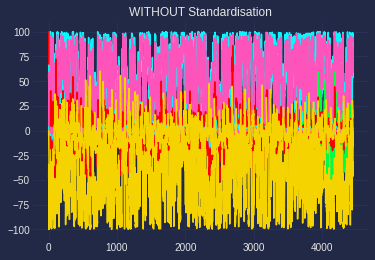

In [1298]:
plt.plot(X_train.values[:,0:15])
plt.title("WITHOUT Standardisation")
plt.show()

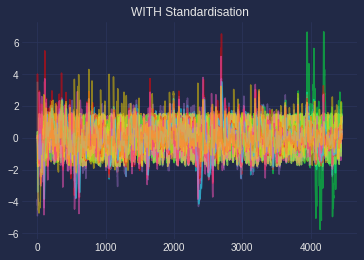

In [1299]:
plt.plot(X_train_sc[:,0:15], alpha=0.5)
plt.title("WITH Standardisation")
plt.show()

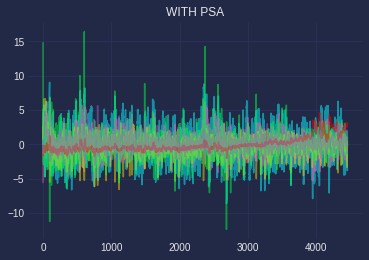

In [1300]:
plt.plot(X_train_pca[:,0:15], alpha=0.5)
plt.title("WITH PSA")
plt.show()

In [1301]:
print(f"Without PCA: {np.shape(X_train)} \nWith PCA: {np.shape(X_train_pca)}")


Without PCA: (4458, 20) 
With PCA: (4458, 6)


In [1302]:
# Import the class
from sklearn.svm import SVR

# Initialize the class
reg = SVR()

# Fit the model
reg.fit(X_train_pca, y_train)

SVR()

<AxesSubplot:xlabel='Date'>

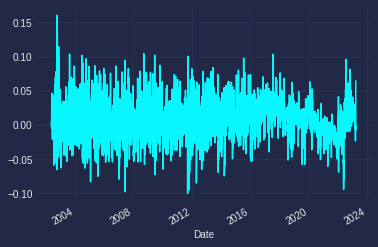

In [1303]:
# Create predictions for the whole dataset
X = np.concatenate((X_train_pca, X_test_pca), axis=0)

dfc["prediction"] = reg.predict(X)

# We verify that the algorithm doesn't predict only way (positive or negative)
dfc["prediction"].plot()

In [1304]:

def BackTest(serie, annualiazed_scalar=252):
    def drawdown_function(serie):
        # We compute Cumsum of the returns
        cum = serie.dropna().cumsum() + 1

        # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
        running_max = np.maximum.accumulate(cum)

        # We compute drawdown
        drawdown = cum / running_max - 1
        return drawdown

    # Import the benchmark
    sp500 = yf.download("NFLX")["Adj Close"].pct_change(1)

    # Change the name
    sp500.name = "STOCK"

    # Concat the returns and the sp500
    val = pd.concat((serie, sp500), axis=1).dropna()
    # Compute the drawdown
    drawdown = drawdown_function(serie) * 100

    # Compute max drawdown
    max_drawdown = -np.min(drawdown)

    # Put a subplots
    fig, (cum, dra) = plt.subplots(1, 2, figsize=(20, 6))

    # Put a Suptitle
    fig.suptitle("Backtesting", size=20)

    # Returns cumsum chart
    cum.plot(serie.cumsum() * 100, color="#39B3C7")

    # SP500 cumsum chart
    cum.plot(val["STOCK"].cumsum() * 100, color="#B85A0F")

    # Put a legend
    cum.legend(["Portfolio", "STOCK"])

    # Set individual title
    cum.set_title("Cumulative Return", size=13)

    cum.set_ylabel("Cumulative Return %", size=11)

    # Put the drawdown
    dra.fill_between(drawdown.index, 0, drawdown, color="#C73954", alpha=0.65)

    # Set individual title
    dra.set_title("Drawdown", size=13)

    dra.set_ylabel("drawdown in %", size=11)

    # Plot the graph
    plt.show()
    # Compute the sortino
    sortino = np.sqrt(annualiazed_scalar) * serie.mean() / serie.loc[serie < 0].std()

    # Compute the beta
    beta = np.cov(val[["return", "STOCK"]].values, rowvar=False)[0][1] / np.var(val["STOCK"].values)

    # Compute the alpha
    alpha = annualiazed_scalar * (serie.mean() - beta * serie.mean())

    
    profit = []
    loss = []
    profit.append(dfc['strategy'] >= 0)
    loss.append(dfc['strategy'] < 0)
    profit_factor = sum(profit) / sum(loss)
    # Print the statistics
    print(f"Sortino: {np.round(sortino, 3)}")
    print(f"Beta: {np.round(beta, 3)}")
    print(f"Alpha: {np.round(alpha * 100, 3)} %")
    print(f"MaxDrawdown: {np.round(max_drawdown, 3)} %")
    print(f"profit_factor: {np.round(beta, 3)}")
    

[*********************100%***********************]  1 of 1 completed


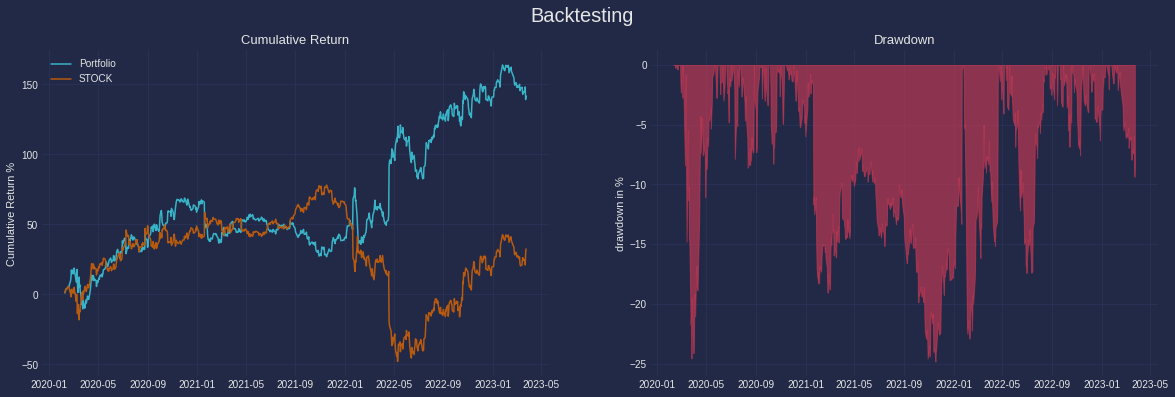

Sortino: 1.454
Beta: -0.199
Alpha: 54.342 %
MaxDrawdown: 24.823 %
profit_factor: -0.199


In [1305]:
    # Compute the position
dfc["position"] = np.sign(dfc["prediction"])

    # Compute the returns
dfc["strategy"] = dfc["returns"] * dfc["position"].shift(1)

dfc["return"] = dfc["strategy"]

BackTest(dfc["return"].iloc[split:])